In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')
%matplotlib inline

np.set_printoptions(precision=2)

In [4]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [5]:
def statistics(target):
    minimum_price = np.amin(target)
    maximum_price = np.amax(target)
    mean_price = np.mean(target)
    median_price = np.median(target)
    std_price = np.std(target)

    print("Statistics for House Prices dataset:\n")
    print("Minimum price: ${}".format(minimum_price)) 
    print("Maximum price: ${}".format(maximum_price))
    print("Mean price: ${}".format(mean_price))
    print("Median price ${}".format(median_price))
    print("Standard deviation of prices: ${}".format(std_price))

In [6]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

In [7]:
print('Train: {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('Test: {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

Train: 1460 rows and 81 columns.
Test: 1459 rows and 80 columns.


In [8]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [11]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
target = train.SalePrice
train.drop(['SalePrice'], axis=1, inplace=True)

In [13]:
statistics(target)

Statistics for House Prices dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price $163000.0
Standard deviation of prices: $79415.29188606751


# TREINO

In [14]:
#retorna a soma das colunas de string que possuem NA.
train.select_dtypes(include='object').isnull().sum()[train.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
#Deleta as colunas com +50% de valores NA.
train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [16]:
#substitui os demais valores NA pela Moda.
for col in ('MSZoning','Exterior1st', 'Exterior2nd','KitchenQual','SaleType','Functional',
            'Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'):
    train[col]=train[col].fillna(train[col].mode()[0])

In [17]:
#retorna a soma das colunas de number que possuem NA.
train.select_dtypes(
    include=['int','float']).isnull().sum()[train.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    train[col]=train[col].fillna(0)
    
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [19]:
for col in train.columns:
    train[col] = encoder.fit_transform(train[col])

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,5,3,36,327,1,3,3,0,4,...,49,0,0,0,0,0,1,2,8,4
1,1,0,3,52,498,1,3,3,0,2,...,0,0,0,0,0,0,4,1,8,4
2,2,5,3,39,702,1,0,3,0,4,...,30,0,0,0,0,0,8,2,8,4
3,3,6,3,31,489,1,0,3,0,0,...,24,108,0,0,0,0,1,0,8,0
4,4,5,3,56,925,1,0,3,0,2,...,70,0,0,0,0,0,11,2,8,4


In [21]:
X_train = scaler.fit_transform(train)
X_train

array([[-1.73,  0.2 , -0.05, ...,  0.14,  0.31,  0.21],
       [-1.73, -1.  , -0.05, ..., -0.61,  0.31,  0.21],
       [-1.73,  0.2 , -0.05, ...,  0.14,  0.31,  0.21],
       ...,
       [ 1.73,  0.44, -0.05, ...,  1.65,  0.31,  0.21],
       [ 1.73, -1.  , -0.05, ...,  1.65,  0.31,  0.21],
       [ 1.73, -1.  , -0.05, ...,  0.14,  0.31,  0.21]])

In [22]:
pca = PCA(n_components=17)
X_train = pca.fit_transform(X_train)

In [23]:
X_train.shape

(1460, 17)

Text(0, 0.5, 'Second Principal Component')

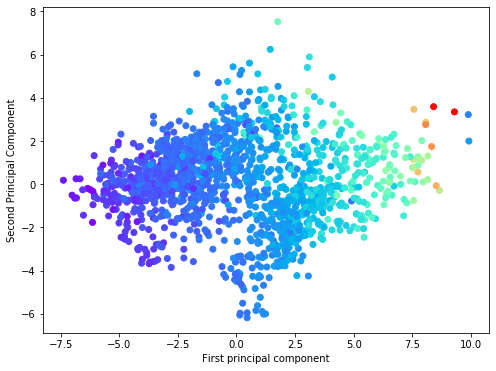

In [24]:
#Correlação entre os 2 primeiros componentes
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 2], c=target, cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# TESTE

In [25]:
test.select_dtypes(include='object').isnull().sum()[test.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [26]:
test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [27]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional', 'Utilities',
            'MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'):
    test[col]=test[col].fillna(test[col].mode()[0])

In [28]:
test.select_dtypes(
    include=['int','float']).isnull().sum()[test.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [29]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    test[col]=test[col].fillna(0)

test['LotFrontage']=test['LotFrontage'].fillna(train['LotFrontage'].mean())

In [30]:
for col in test.columns:
    test[col] = encoder.fit_transform(test[col])

In [31]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,2,57,777,1,3,3,0,4,...,0,0,0,18,0,0,5,4,8,4
1,1,0,3,58,964,1,0,3,0,0,...,24,0,0,0,0,24,5,4,8,4
2,2,5,3,51,947,1,0,3,0,4,...,22,0,0,0,0,0,2,4,8,4
3,3,5,3,55,587,1,0,3,0,4,...,24,0,0,0,0,0,5,4,8,4
4,4,11,3,20,118,1,0,1,0,4,...,68,0,0,27,0,0,0,4,8,4


In [32]:
X_test = scaler.fit_transform(test)
X_test

array([[-1.73, -0.98, -1.5 , ...,  1.71,  0.32,  0.2 ],
       [-1.73, -0.98, -0.04, ...,  1.71,  0.32,  0.2 ],
       [-1.73,  0.16, -0.04, ...,  1.71,  0.32,  0.2 ],
       ...,
       [ 1.73, -0.98, -0.04, ..., -1.36,  0.32, -3.59],
       [ 1.73,  1.07, -0.04, ..., -1.36,  0.32,  0.2 ],
       [ 1.73,  0.16, -0.04, ..., -1.36,  0.32,  0.2 ]])

In [33]:
pca = PCA(n_components=17)
X_test = pca.fit_transform(X_test)

In [34]:
X_test.shape

(1459, 17)

# MODELO

In [35]:
y = target

In [36]:
linear_reg = LinearRegression(n_jobs=-1, normalize=True, fit_intercept=True)
linear_reg.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [37]:
pred = linear_reg.predict(X_test)

In [40]:
linear_reg.score(X_train, y)

0.8199941869820644

In [45]:
sample = test['Id'].to_frame()
sample['SalePrice'] = pred
sample.to_csv('sample_submission_300120.csv', index=False)
sample.head(2)

,Id,SalePrice
0,0,133033.404875
1,1,192804.230013


In [44]:
sample.shape

(1459, 2)